In [73]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fibe-india-tweets/fibeIndia_cleaned_tweets.csv
/kaggle/input/cash-app-tweets/casheapp_cleaned_tweets.csv
/kaggle/input/kreditbee-tweets/refined_kreditbee_data.csv
/kaggle/input/homecredit-inbound-tweets/adjusted_refined_Homecredit_data (1).csv


In [74]:
import pandas as pd

In [75]:
df = pd.read_csv("/kaggle/input/homecredit-inbound-tweets/adjusted_refined_Homecredit_data (1).csv")
df

,tweet_link,tweet_id,author_name,author_handle,text,timestamp,likes,retweets,replies,is_reply,image_urls,year_month
0,https://x.com/K_S_RATNAPARKHI/status/184393640...,1843936402402426948,कल्याणराव रत्नपारखी,@K_S_RATNAPARKHI,*Dear customer kreditbee*\n\nववज़िदटींग आईडी: ...,2024-10-09 08:47:51+00:00,0,0,1,False,NaN,2024-10
1,https://x.com/DarmakarS/status/184393007217421...,1843930072174211205,Darmakar Sairam,@DarmakarS,Why u blackmailing us like this using abusing ...,2024-10-09 08:22:42+00:00,0,0,1,False,NaN,2024-10
2,https://x.com/iamamityadab/status/184392211404...,1843922114048602351,Amit yadav,@iamamityadab,@Paisabazaar_in You're sending the same Kred...,2024-10-09 07:51:05+00:00,0,0,1,False,https://pbs.twimg.com/media/GZbtY8zasAAKVBM?fo...,2024-10
3,https://x.com/sajjak786ali/status/184392259592...,1843922595923505410,Sajjak Ali,@sajjak786ali,@kreditbee call me,2024-10-09 07:52:59+00:00,0,0,1,False,NaN,2024-10
4,https://x.com/K_S_RATNAPARKHI/status/184391653...,1843916538082144479,कल्याणराव रत्नपारखी,@K_S_RATNAPARKHI,Check ur DM and Stop this now.,2024-10-09 07:28:55+00:00,0,0,1,False,NaN,2024-10
...,...,...,...,...,...,...,...,...,...,...,...,...
393,https://x.com/ChangeKarliya/status/18196291118...,1819629111888777506,mr.lovalova,@ChangeKarliya,bta kse kru msg?,2024-08-03 06:59:22+00:00,0,0,2,False,https://pbs.twimg.com/media/GUCfCLsWcAA4-_B?fo...,2024-08
394,https://x.com/ChangeKarliya/status/18195762090...,1819576209044656410,mr.lovalova,@ChangeKarliya,yeah now i have to subscribe premium twitter f...,2024-08-03 03:29:08+00:00,0,0,1,False,NaN,2024-08
395,https://x.com/sauravkumar809/status/1819337353...,1819337353283977330,KUMAR SAURAV,@sauravkumar809,Again @HomeCredit_In planning to do the frau...,2024-08-02 11:40:01+00:00,1,0,2,False,NaN,2024-08
396,https://x.com/Aniket1322h/status/1818992713800...,1818992713800483300,Aniket choudhry,@Aniket1322h,Registered mobile no. 9310413080\nDob:-02/05/2...,2024-08-01 12:50:32+00:00,0,0,2,False,https://pbs.twimg.com/media/GT5cOT9bsAE9Gha?fo...,2024-08


In [76]:
!pip install langdetect
!pip install deep_translator

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [77]:
import langdetect
from deep_translator import GoogleTranslator

In [78]:
def get_language(text):
    try:
        return langdetect.detect(text)
    except KeyboardInterrupt as e:
        raise(e)
    except:
        return '<-- ERROR -->'

In [79]:
def get_translation(text):
    try:
        return GoogleTranslator(source='auto', target='en')\
          .translate(str(text))
    except KeyboardInterrupt as e:
        raise(e)
    except:
        return '<-- ERROR -->'

In [80]:
df['language'] = df["text"].map(get_language)
df['tweets_transl'] = df["text"].map(get_translation)

In [81]:
df.head(50)

,tweet_link,tweet_id,author_name,author_handle,text,timestamp,likes,retweets,replies,is_reply,image_urls,year_month,language,tweets_transl
0,https://x.com/K_S_RATNAPARKHI/status/184393640...,1843936402402426948,कल्याणराव रत्नपारखी,@K_S_RATNAPARKHI,*Dear customer kreditbee*\n\nववज़िदटींग आईडी: ...,2024-10-09 08:47:51+00:00,0,0,1,False,NaN,2024-10,hi,*Dear customer kreditbee*\n\nVisit has been sc...
1,https://x.com/DarmakarS/status/184393007217421...,1843930072174211205,Darmakar Sairam,@DarmakarS,Why u blackmailing us like this using abusing ...,2024-10-09 08:22:42+00:00,0,0,1,False,NaN,2024-10,en,Why u blackmailing us like this using abusing ...
2,https://x.com/iamamityadab/status/184392211404...,1843922114048602351,Amit yadav,@iamamityadab,@Paisabazaar_in You're sending the same Kred...,2024-10-09 07:51:05+00:00,0,0,1,False,https://pbs.twimg.com/media/GZbtY8zasAAKVBM?fo...,2024-10,en,@Paisabazaar_in You're sending the same Kred...
3,https://x.com/sajjak786ali/status/184392259592...,1843922595923505410,Sajjak Ali,@sajjak786ali,@kreditbee call me,2024-10-09 07:52:59+00:00,0,0,1,False,NaN,2024-10,en,@kreditbee call me
4,https://x.com/K_S_RATNAPARKHI/status/184391653...,1843916538082144479,कल्याणराव रत्नपारखी,@K_S_RATNAPARKHI,Check ur DM and Stop this now.,2024-10-09 07:28:55+00:00,0,0,1,False,NaN,2024-10,en,Check ur DM and Stop this now.
5,https://x.com/AtulShu32533498/status/184391548...,1843915483109802289,Atul Shukla,@AtulShu32533498,@kreditbee Your collection agent Joginder is ...,2024-10-09 07:24:44+00:00,0,0,1,False,https://pbs.twimg.com/media/GZbnHvpWUAACFAW?fo...,2024-10,en,@kreditbee Your collection agent Joginder is ...
6,https://x.com/AtulShu32533498/status/184391849...,1843918493135319270,Atul Shukla,@AtulShu32533498,"I am sending you dm, but this is not the first...",2024-10-09 07:36:41+00:00,0,0,1,False,NaN,2024-10,en,"I am sending you dm, but this is not the first..."
7,https://x.com/Shaikom72445964/status/184358020...,1843580209947164782,Shaik omar farooq,@Shaikom72445964,See how they are threatening. @kreditbee @RBI,2024-10-08 09:12:28+00:00,0,0,1,False,https://pbs.twimg.com/media/GZW2bPyasAATZyO?fo...,2024-10,en,See how they are threatening. @kreditbee @RBI
8,https://x.com/Shyama317953/status/184356511903...,1843565119030386805,Shyama,@Shyama317953,@kreditbee,2024-10-08 08:12:30+00:00,0,0,1,False,NaN,2024-10,af,@kreditbee
9,https://x.com/TechsuggestA/status/184328396170...,1843283961700819290,Anupam Banerjee,@TechsuggestA,@kreditbee your approval time is biggest prob...,2024-10-07 13:35:17+00:00,0,0,1,False,NaN,2024-10,en,@kreditbee your approval time is biggest prob...


In [82]:
# Drop rows where the 'language' column has the value '<-- ERROR -->'
df = df[df['language'] != '<-- ERROR -->']

df.head(50)

,tweet_link,tweet_id,author_name,author_handle,text,timestamp,likes,retweets,replies,is_reply,image_urls,year_month,language,tweets_transl
0,https://x.com/K_S_RATNAPARKHI/status/184393640...,1843936402402426948,कल्याणराव रत्नपारखी,@K_S_RATNAPARKHI,*Dear customer kreditbee*\n\nववज़िदटींग आईडी: ...,2024-10-09 08:47:51+00:00,0,0,1,False,NaN,2024-10,hi,*Dear customer kreditbee*\n\nVisit has been sc...
1,https://x.com/DarmakarS/status/184393007217421...,1843930072174211205,Darmakar Sairam,@DarmakarS,Why u blackmailing us like this using abusing ...,2024-10-09 08:22:42+00:00,0,0,1,False,NaN,2024-10,en,Why u blackmailing us like this using abusing ...
2,https://x.com/iamamityadab/status/184392211404...,1843922114048602351,Amit yadav,@iamamityadab,@Paisabazaar_in You're sending the same Kred...,2024-10-09 07:51:05+00:00,0,0,1,False,https://pbs.twimg.com/media/GZbtY8zasAAKVBM?fo...,2024-10,en,@Paisabazaar_in You're sending the same Kred...
3,https://x.com/sajjak786ali/status/184392259592...,1843922595923505410,Sajjak Ali,@sajjak786ali,@kreditbee call me,2024-10-09 07:52:59+00:00,0,0,1,False,NaN,2024-10,en,@kreditbee call me
4,https://x.com/K_S_RATNAPARKHI/status/184391653...,1843916538082144479,कल्याणराव रत्नपारखी,@K_S_RATNAPARKHI,Check ur DM and Stop this now.,2024-10-09 07:28:55+00:00,0,0,1,False,NaN,2024-10,en,Check ur DM and Stop this now.
5,https://x.com/AtulShu32533498/status/184391548...,1843915483109802289,Atul Shukla,@AtulShu32533498,@kreditbee Your collection agent Joginder is ...,2024-10-09 07:24:44+00:00,0,0,1,False,https://pbs.twimg.com/media/GZbnHvpWUAACFAW?fo...,2024-10,en,@kreditbee Your collection agent Joginder is ...
6,https://x.com/AtulShu32533498/status/184391849...,1843918493135319270,Atul Shukla,@AtulShu32533498,"I am sending you dm, but this is not the first...",2024-10-09 07:36:41+00:00,0,0,1,False,NaN,2024-10,en,"I am sending you dm, but this is not the first..."
7,https://x.com/Shaikom72445964/status/184358020...,1843580209947164782,Shaik omar farooq,@Shaikom72445964,See how they are threatening. @kreditbee @RBI,2024-10-08 09:12:28+00:00,0,0,1,False,https://pbs.twimg.com/media/GZW2bPyasAATZyO?fo...,2024-10,en,See how they are threatening. @kreditbee @RBI
8,https://x.com/Shyama317953/status/184356511903...,1843565119030386805,Shyama,@Shyama317953,@kreditbee,2024-10-08 08:12:30+00:00,0,0,1,False,NaN,2024-10,af,@kreditbee
9,https://x.com/TechsuggestA/status/184328396170...,1843283961700819290,Anupam Banerjee,@TechsuggestA,@kreditbee your approval time is biggest prob...,2024-10-07 13:35:17+00:00,0,0,1,False,NaN,2024-10,en,@kreditbee your approval time is biggest prob...


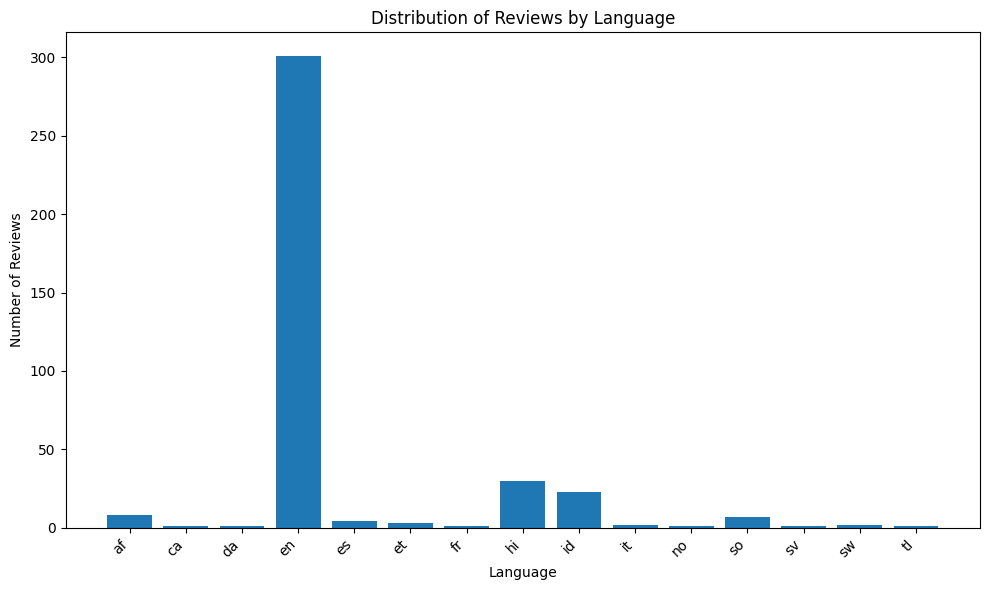

In [83]:
import matplotlib.pyplot as plt


# Group the data by language and count the number of reviews in each language
language_counts = df.groupby('language')['tweets_transl'].count()

# Create a bar plot
plt.figure(figsize=(10, 6))  
plt.bar(language_counts.index, language_counts.values)
plt.xlabel('Language')
plt.ylabel('Number of Reviews')
plt.title('Distribution of Reviews by Language')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  
plt.show()

In [84]:
!pip install bertopic

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [85]:
from bertopic.representation import KeyBERTInspired
from bertopic import BERTopic

In [66]:
tweets = df['tweets_transl']

In [86]:
from sklearn.feature_extraction.text import CountVectorizer

In [87]:
representation_model = KeyBERTInspired()

In [88]:
vectorizer_model = CountVectorizer(min_df=5, stop_words = 'english')

In [89]:
topic_model = BERTopic(nr_topics = 'auto', vectorizer_model = vectorizer_model,
                      representation_model = representation_model)

In [90]:
topics, ini_probs = topic_model.fit_transform(tweets)

In [91]:
topic_info_df = topic_model.get_topic_info()
repr_tweets = topic_info_df.Representative_Docs.sum()

In [96]:
print(repr_tweets)

['Why u should avoid  @kreditbee   #nbfc   #nocustomerservice  keep doing timepass of verification of below amount.  #joke   #avoid', '@kreditbee  Criminal breach case for 12 DPD  case, please get this guys DRA certification done. \n\n @714290', '@kreditbee  plz close my account, I have called customer care many times but the call always get disconnected,i want my account to be closed as soon as possible', '@kreditbee  what is this going on I have already mailed your team and recovery agents are calling my friends and relatives and threatening them  @RBI   @DasShaktikanta   I have just asked for time yet you want to mark me defaulter, is it right??? Ask this man to stop right away', '@RBIsays \n @kreditbee  \n\nDear sir, \n\nI have time to pay kreditbee loan but  kreditbee agent hraastment and blackmail to me and again again call to my contact list this is Illegal how to stap please help me', 'Best Instant Loan Apps For Huge Emergency.\n1. KreditBee  @kreditbee \n2. Kissht  @Kissht_EMI

In [95]:
!pip install ipywidgets

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [103]:
!huggingface-cli login

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)



    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    To log in, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Enter your token (input will not be visible): Traceback (most recent call last):
  File "/opt/conda/bin/huggingface-cli", line 8, in <module>
    sys.exit(main())
  File "/opt/conda/lib/python3.10/site-packages/huggingface_hub/commands/huggingface_cli.py", line 57, in main
    service.run()
  File "/opt/conda/lib/python

In [105]:
from huggingface_hub import notebook_login
notebook_login()

In [48]:
import torch
import transformers
from transformers import pipeline

In [51]:
model_id = "meta-llama/Llama-3.2-1B-Instruct"

In [ ]:
pipe = pipeline(
    "text-generation",
    model=model_id,
    torch_dtype=torch.bfloat16,
    device_map="auto",
)

In [ ]:
delimiter = '####'
system_message = '''You're a helpful assistant. Your task is to identify key complaints and return a complete JSON list of themes. You must:
1. Return ONLY valid JSON
2. Always complete the JSON structure
3. Never truncate or leave incomplete entries
4. Include exactly 5-8 themes.
5. Never include any explanatory text, only the JSON output'''

In [ ]:
user_message = f'''Analyze these customer reviews and return exactly 8-10 complaint themes (no more, no less) in this JSON format. Ensure the JSON is complete and properly formatted:
[
    {{"topic_name": "Name of Issue", 
     "topic_description": "Brief description"}},
    {{"topic_name": "Name of Issue", 
     "topic_description": "Brief description"}}
]

{delimiter}
{delimiter.join(repr_tweets)}
{delimiter}
'''

In [ ]:
messages = [
    {'role': 'system', 'content': system_message},
    {'role': 'user', 'content': user_message},
]

In [ ]:
outputs = pipe(
    messages,
    max_new_tokens=1024,
)

In [ ]:
print(outputs)

In [ ]:
import json

In [ ]:
topics_list = (print(outputs[0]["generated_text"][-1]))
topic_df = pd.DataFrame(topics_list)

In [ ]:
data = outputs[0]['generated_text'][-1]['content']

In [ ]:
print(data)

In [ ]:
type(data)

In [259]:
data_string = '''[
    {
        "topic_name": "Unsolicited Phone Calls and Harassment",
        "topic_description": "Unwanted phone calls and aggressive behavior from recovery agents"
    },
    {
        "topic_name": "Misuse of Customer Information",
        "topic_description": "Recovery agents misusing customer information and sharing it with unauthorized parties"
    },
    {
        "topic_name": "Threats and Intimidation",
        "topic_description": "Recovery agents making threatening calls and messages to customers"
    },
    {
        "topic_name": "Unprofessional Behavior",
        "topic_description": "Recovery agents using foul language and being unprofessional in their interactions with customers"
    },
    {
        "topic_name": "Misrepresentation of Services",
        "topic_description": "Recovery agents misrepresenting their services and collecting money without customer consent"
    },
    {
        "topic_name": "Unlawful Threats",
        "topic_description": "Recovery agents making unlawful threats to customers, including threats to harm family members"
    },
    {
        "topic_name": "Harassment by Recovery Agents",
        "topic_description": "Recovery agents harassing customers, including making unwanted phone calls and messages"
    },
    {
        "topic_name": "Lack of Accountability",
        "topic_description": "Recovery agents not taking responsibility for their actions and making excuses for their behavior"
    },
    {
        "topic_name": "Unsatisfactory Customer Service",
        "topic_description": "Recovery agents failing to provide satisfactory customer service and resolving customer issues in a timely manner"
    }
]'''

In [260]:
json_data = json.loads(data_string)


In [261]:
topic_df = pd.DataFrame(json_data)

In [262]:
print(topic_df)

                               topic_name  \
0  Unsolicited Phone Calls and Harassment   
1          Misuse of Customer Information   
2                Threats and Intimidation   
3                 Unprofessional Behavior   
4           Misrepresentation of Services   
5                        Unlawful Threats   
6           Harassment by Recovery Agents   
7                  Lack of Accountability   
8         Unsatisfactory Customer Service   

                                   topic_description  
0  Unwanted phone calls and aggressive behavior f...  
1  Recovery agents misusing customer information ...  
2  Recovery agents making threatening calls and m...  
3  Recovery agents using foul language and being ...  
4  Recovery agents misrepresenting their services...  
5  Recovery agents making unlawful threats to cus...  
6  Recovery agents harassing customers, including...  
7  Recovery agents not taking responsibility for ...  
8  Recovery agents failing to provide satisfactor...  

In [263]:
topic_df.to_csv("topic_des_fibe.csv",index = False)

In [264]:
topics_list_str = '####'.join(topic_df['topic_name'].tolist())

In [265]:
print(topics_list_str)

Unsolicited Phone Calls and Harassment####Misuse of Customer Information####Threats and Intimidation####Unprofessional Behavior####Misrepresentation of Services####Unlawful Threats####Harassment by Recovery Agents####Lack of Accountability####Unsatisfactory Customer Service


In [266]:
def preprocess_topic(response):
    try:
        # Strip whitespace and capitalize the response
        topic = response.strip().capitalize()  
        
        print(topic)
        return topic
    except Exception as e:
        print(f"An error occurred: {e}")
        return ""

In [267]:
def classify_tweet(tweet, topics_list_str, delimiter='####'):
    # Prepare the messages for classification
    system_message = """You are a precise classification assistant specialized in analyzing customer complaints. 
    Your sole task is to match customer reviews to predefined complaint categories.
    You must always respond with exactly one category in quotation marks, or an empty string if no category matches."""

    user_message = f'''Classify the following customer review into exactly one topic from the provided list.

    RESPONSE FORMAT:
    - Return ONLY the topic in quotes (e.g. "Poor Customer Service")
    - If no topic matches, return empty quotes ("")
    - Do not include any explanation or additional text

    AVAILABLE TOPICS:
    {topics_list_str}

    RULES:
    1. Choose the MOST specific topic that applies
    2. Pick only ONE topic, even if multiple could apply
    3. Return empty string if the review is:
       - Too vague or unclear
       - Doesn't match any topic
       - Just a reference without actual complaint
       - Contains no actionable information

    EXAMPLE COMPLAINTS AND CLASSIFICATIONS:

    COMPLAINT: "They keep calling my relatives and friends from my contact list without my permission. This is a violation of privacy and causing embarrassment."
    OUTPUT: "Misuse of Customer Information"

    COMPLAINT: "The recovery agent calls 15 times daily and uses threatening language. He said he would inform my employer if I don't pay immediately."
    OUTPUT: "Harassment by Recovery Agents"

    COMPLAINT: "I've sent multiple emails but get no response. Customer service never picks up calls and they keep sending automated replies."
    OUTPUT: "Unsatisfactory Customer Service"

    COMPLAINT: "The agent threatened to file a police case and said they would put me in jail if I don't pay by tomorrow."
    OUTPUT: "Unlawful Threats"

    COMPLAINT: "I've been trying to close my loan for months. They don't respond and keep adding penalties without explanation."
    OUTPUT: "Lack of Accountability"


    REVIEW TO CLASSIFY:
    {delimiter}{tweet}{delimiter}'''

    messages = [
        {'role': 'system', 'content': system_message},
        {'role': 'user', 'content': user_message}
    ]
    
    # Get model response
    response = pipe(
        messages,
        max_new_tokens=256,  # Reduced as we expect short responses
        temperature=0.1      # Lower temperature for more consistent responses
    )
    
    # Parse the response
    try:
        response_text = response[0]['generated_text'][-1]['content'].strip()
        # Remove any extra quotes or whitespace
        print(tweet)
        topics = preprocess_topic(response_text)
        print(topics)
        return topics
    except Exception as e:
        print(f"Error processing response: {e}")
        return ""

# Apply classification to all tweets
def add_classifications(df, topics_list_str):
    # Create new column with classifications
    df['topics'] = df['tweets_transl'].apply(lambda x: classify_tweet(x, topics_list_str))
    return df

# To use the function
df = add_classifications(df, topics_list_str)

# To see the results
print(df[['tweets_transl', 'topics']].head())


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


my customer id - is 1257090850, i already uploaded my 3 months bank salary statement with salary credited on time but unfortunately error show to re-again upload, please check properly and approve my credit limit immediately. 
status pending show  

please approve my
"unsatisfactory customer service"
"unsatisfactory customer service"


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


i already share the bank statement but you always share the same email. 

my loan approval is showing still pending. please update the same.
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


recovery agent 9035791681 is talking very rudely to me and misbehaving , please help , i need some time to payback

regards 
kannan 
you can call me on 8595486327
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


If he made two late EMI payments then he locked his profile
"unsolicited phone calls and harassment"
"unsolicited phone calls and harassment"


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


i am writing to express my frustration regarding the incessant phone calls i have been receiving from your company, fibe. these calls have become a daily occurrence, and i am extremely concerned by the unjustified and unjudicious nature of this intrusion.
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


since your department has been in contact with me, i assume you already have my contact details on file. i trust you understand that i cannot share my personal information in a public forum
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


sir your person is calling at my office and  http:// threatening.is  this allowed..?
"unsolicited phone calls and harassment"
"unsolicited phone calls and harassment"


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


i have spoken with     employee still    employee or their 3rd party keep on calling my family and friend and relatives for threatening from following numbers. gunda gardi failai hai    ne.
"unsolicited phone calls and harassment"
"unsolicited phone calls and harassment"


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


loan number is 1006819069. screen shot and other details were already shared over email.
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


they call the contacts. they. alled my previous employer ceo 70-80 times.    guidelines are not for such app based nbfcs.          please take action against    .
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


care.in what's wrong with them idk i try to call no response i email no response even my 8.5k remaining but they charged 10k interest on it as not paying,they tell you will get call but no help no call. pls help to get rid of it  response.crpc.org.in.
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


we urge the company to take action against such practices and ensure a more professional approach.
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


your recovery agent aman having contact no. 8857001031 is continuously calling and threatening the customer to make the payment within 24hrs.
 this aggressive behavior is unacceptable and must be addressed immediately. customers deserve respect and fair treatment.
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


your relentless calls to a customer who has communicated their financial struggles are unacceptable! the individual has already reached out regarding their inability to pay the emi. please respect their situation and stop harassment.
"unsolicited phone calls and harassment"
"unsolicited phone calls and harassment"


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


sir,
repeatedly abused and spoken to by the agent of fibe. if the customer's financial condition is not correct, will the fibe agents abuse him?
agent no. 9643920778, 7065092940
loan id is 1435179665
"unsolicited phone calls and harassment"
"unsolicited phone calls and harassment"


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


did u taken any action?
"unsolicited phone calls and harassment"
"unsolicited phone calls and harassment"


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


stop harassment
"harassment by recovery agents"
"harassment by recovery agents"


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


stop calling people unnecessarily    please register complaint as dnd application is not working.
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


i took a loan from your app and due to job switch i wasn't able to pay the emi cz my notice money about to arrive.
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


yes exactly the agent came to home and told every confidential thing to my family what kind of hooliganism is this.
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


request everyone to avoid taking loans from    loan app. especially ladies, please delete this app from your phone for your own good. 

request    to check on loan recovery techniques used by their agents. they are  blackmailing women who have taken loans from their
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


their agents cross the limit of decency and never share the details of nbfc from where  they are calling.
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


fibe recovery agent continuesly harrase me for loan recovery. please take strict action against them. my id - 1437895196
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


You should throw a lot of money at the agency guys
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


ban this nbfc
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


rbi look it this
"unsolicited phone calls and harassment"
"unsolicited phone calls and harassment"


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


stop this illegal practice
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


ban agency and nbfc
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


RBI should take action against them
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


fibe recovery agent threatened and harrase me at 9:25 pm on watsapp calling for loan recovery. is this proper way and right time for recovery. please do strict action against him.
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


When will these people's hooliganism stop?
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


I didn't even meet
"unsatisfactory customer service"
"unsatisfactory customer service"


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


please investigate this issue, illegal practice..
"unsolicited phone calls and harassment"
"unsolicited phone calls and harassment"


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


ban this agency
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


this type of agency should be banned
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


please take appropriate and effective action against this type of act done by the recovery agent of
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


ban karo isko....
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


i don't know anyone with name srinivas ps, your customer care executives are continuously calling me and asking for him. please stop calling me.
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


should look this matter seriously
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


these evil spirits need to be treated
"unsolicited phone calls and harassment"
"unsolicited phone calls and harassment"


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


nbfc equals gunda sahukar
"unsolicited phone calls and harassment"
"unsolicited phone calls and harassment"


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


a fine guy doesn't take any action, he just replies to keep quiet
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


stop harassment
"harassment by recovery agents"
"harassment by recovery agents"


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


yes i am a customer since 2022, and one of your employee told me she is not even hesitant to call me 200 times a day..this is real harassment..
"unsolicited phone calls and harassment"
"unsolicited phone calls and harassment"


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


I am surprised as to how RBI gave license to such a lousy and thief company.
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


please look             these applications are charging excessively high interest rates, and even a one-day delay results in significant penalties. additionally, users face harassment, with relentless follow-up calls.
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


this guy caling my family with fake dp name try to extort 40000 as he said calling from dp, i knwo hez    goon. plz help dp m
not in india and my family isnt safe
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


why your collection executive can not talk properly. despite telling them that i am not medically fit and listen such things. the lady named deepika did not stop. already sent recording on care.in. request you stop such things.
"unsolicited phone calls and harassment"
"unsolicited phone calls and harassment"


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


request everyone to avoid taking loans from    loan app. especially ladies, please delete this app from your phone for your own good. 

request    to check on loan recovery techniques used by their agents. they are  blackmailing women who have taken loans from their
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


i applied for a loan on friday with a 10-min disbursal promise, but it’s been over 3 days. customer care keeps saying 'end of the day' with no resolution. why rely on nbfcs in emergencies if service isn’t prompt? why advertise 10-min disbursal if you can’t deliver?
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


this is called next level harassment by this company          i will escalate this matter in rbi very soon if they don't take action against that person
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


rbi will not do anything in all these cases only cyber police complaint solution just intimate the fibe if they take strict action against the agent then it is okay otherwise fir will have to be made
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


why you making fool to all cx and fake promise ill escalate this in rbi and nbfc fibe making fool to costumers
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


please call me facing a lot of harrassment mentally by your team 
please call me immediately
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


please call me
"unsolicited phone calls and harassment"
"unsolicited phone calls and harassment"


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


i'm going through financial crises. i'm depressed coz having alot of financial debt.i asked    for 2months dro moratorium so i can stable in financial situation i will repay.but this what i got reply from fibe. plz help me out
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


froud company don't take loan this app this is froud company attached your agent harasment screenshot
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


this is called harrasment and open violation of rbi rule
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


i filed a complaint with your customer service regarding the abusive behavior of a recovery agent. however, no action has been taken, and i have received no updates. this lack of professionalism is disappointing.
"unsatisfactory customer service"
"unsatisfactory customer service"


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


respond ?? your collection team calling me 100 times in a day even on sunday ? as per rbi guidlines no collection team can call no working hours
"unsolicited phone calls and harassment"
"unsolicited phone calls and harassment"


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


can we connect iver dm about an issue?
"unsolicited phone calls and harassment"
"unsolicited phone calls and harassment"


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


mr. sudir deshmukh(as he said his name) holding number +91 88287 16861 employee of    constantly calling to my family and threatening. also some of my relatives as well who are not involved in loan.(1)
"unsolicited phone calls and harassment"
"unsolicited phone calls and harassment"


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


, you are running a scam in the name of higher education. your counselor  convinced me to take a loan through    and after  refunded all the amount before start the emi and same mail sent to the fibe team with the transcript but
"unsolicited phone calls and harassment"
"unsolicited phone calls and harassment"


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


pls mystery shop your inhumane collection activities. i am a distressed customer and will hold you responsible if anything happens to me due to this harassment. they connect via unrecorded channels (wa).
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


i have sent you dm with details and i will see what solution i will get or i will be putting everything that happened on social every where
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


your recovery agent harassed my father, exaggerated my loan amount, and used rude behavior during recovery calls. this is in clear violation of rbi guidelines. kindly take immediate action to resolve this issue.
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


could you please check my recent email , if your authorisation agency is not talk in polite way not going to pay single rupee
"unsolicited phone calls and harassment"
"unsolicited phone calls and harassment"


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


there's a guy from came to my home telling my father confidential things and told him that i haven't paid it since 2 months which is a lie and taking to me unprofessionally!!! is it acceptable???
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


pls take action this early salary    this harrasing last 5 year not close my loan and not provide settment
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


i need to stop this , we have need a 2 to 3 month time for pay the emi after tham and any collection team has coming for home we take legal action from him and company
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


please don't harass me by calling so much , currently i have medical emergency i will pay by december
"unsolicited phone calls and harassment"
"unsolicited phone calls and harassment"


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


my limit is blocked ..kindly tell your backend team to reconsider the case
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


hello    
your agency debt care enterprises gives me a threat that he will call on my contact list and he will come and sit in my address he will not go until the payment is received.
is calling on the contact list is legal as per rbi guidelines.
cust id 1428924713
"unsolicited phone calls"
"unsolicited phone calls"


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


please take neccssary steps against this company they are threatening me and my family , i already informed them that i will clear the emi and every month i used do that but still they are giving us threat
"unsolicited phone calls and harassment"
"unsolicited phone calls and harassment"


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


after paying all my amount and getting noc they are calling my family and abusing       kindly ban this application as soon as possible otherwise so many death wil occur in few days
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


i took loan from fibe  due to some medical emergency and lost my job i am not able to pay emi and informed them over mail that i'll pay emi after one month once i get the job . i never denny even after informed over mail ...their recovery team calling my relative
"unsolicited phone calls and harassment"
"unsolicited phone calls and harassment"


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


please solve my login issue first its been there since june but has not been solved yet ,i don’t even know if my payments are getting updated and what charges are being levied ,this is pathetic service
"unsatisfactory customer service"
"unsatisfactory customer service"


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


my customer id is- 1423590620
and am unable to withdraw my pre approved limits request you to kindly enable the same on priority basis
"unsolicited phone calls and harassment"
"unsolicited phone calls and harassment"


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


i have taken loan from     but currently i'm going through financial crises,im in depression due to  alot of debts so i can't repay loan for 2months.i want to postpone my emi due date.           plz help me out with it
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


"   i cancelled my admission, but auto-pay for my loan is still active despite multiple requests to stop it.this issue remains unresolved,and it's causing unnecessary financial strain. please resolve this asap!              "
"unsatisfaction with customer service"
"unsatisfaction with customer service"


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


my client regardless of telling yours       agent sneha along with 2 other who claims to be a collection agents from fibe has been calling and messaging continuously even after my client has explained his situation which amounts to harassment.
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


your agents are threatening to visit my office and harassing me despite my financial crisis and willingness to settle. this violates rbi guidelines. please resolve this immediately.
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


it's a thief party
"unsolicited phone calls and harassment"
"unsolicited phone calls and harassment"


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


distrod cibil no cal no massage bad man
"unsolicited phone calls and harassment"
"unsolicited phone calls and harassment"


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


distroyed cibil and no any mail no call
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


your agent are abusing me.

agent details in screenshot 
fibe team immediate action 

fyi   

my loan account number : lai1005689047
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


Such agent should be handed over to the crime branch people.
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


hi i need urgent resolution..pls dm me..
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


i have dm'ed..please look into it..
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


some ladies called continuously here these numbers who called me and my family members. +918655758079
+912269980063, +912269980002,
+912269980099, 
please take strict action against them or i'll make suicide not and put it on social media and police station.
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


this people are encouraging to authorised agency to follow same kind of practises don't pay single rupee to them
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


Respected Sir, only one EMI of my loan is left. These people are being very abusive. Should I commit suicide?
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


i dnt need any offer just need 20th oct to payment ,i don't wanna suicide kindly help me save my life
"unsolicited phone calls and harassment"
"unsolicited phone calls and harassment"


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


it is humble request please don't call my contacts and parents regarding this
"unsolicited phone calls and harassment"
"unsolicited phone calls and harassment"


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


i have a loan with    and i told them to pay on 20 on my salary date but    employee calling my family and relatives and blackmailing them they are threatening them. my relatives are so scared & they are innocent in this case.
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


close the loan now
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


as i am requesting my last emi payment will be happened on 20th oct than why your executive are calling again and again
"unsolicited phone calls and harassment"
"unsolicited phone calls and harassment"


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


when you will stop harrasing me and my family.
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


again i have received 1 threaten call from your agent sonam. when you will be stop harrasing me and my family and friends.
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


kindly respond to my mails with appropriate and requested documents other than shooting automated standard replies.
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


are your social media responses auto generated too? i have not answered my questions in mail. every time put a reminder, automated responses have been sent. kindly double check before answering.
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


fibe loan recovery agent abused me after negotiating of settlement i request fibe that seriously follow them
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


If the product has been shipped then please provide a new tracking number...The previous tracking number is showing the item as lost and the courier company has also said that it will not be delivered... Please provide a new tracking number if you have resolved the issue
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


fibe app is cheating its customers. does not deliver the prize after winning it in the contest. i had also complained but their customer care team is very bad, they do not provide any help.
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


i have never shared any of my friends mumber as a reference but still nbfc hacked my contact details and calling my friends and family.         mam please help me against this nbfc.
i am ready to pay their emi but after mar'25 on mthly emi of 5k
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


i have already told that i will pay on 20 th oct why r u abusing my family and calling them for suicide
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


hello    one for your recovery agents is violating rbi guideline’s and calling my friend on whatsapp and abusing him and even calling people from his contact list and she is calling on whatsapp so that the call cannot be recorded please look into this asap
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


i have already sent my number, still no call. the agent sumit patwa 098201 52054 has again threatened to come to my house and call my landlord. he said he will destroy my reputation and ask my landlord to evict me. this is against rbi guidelines.      please take action
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


hi fibe team, please feel free to reach out on the registered number on 10th october. i shall be avialble
"unsolicited phone calls and harassment"
"unsolicited phone calls and harassment"


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


again your agency partner started abusing me ..what do you want now ? you just have trained your agency to abuses us. pleas stop this kind of nonsense now. don't defame ur brand.
"unsolicited phone calls and harassment"
"unsolicited phone calls and harassment"


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


pls ask ur agency to not to use slang languages are they have abused my father and my friends. this is totally not good and also pls dont say that ur team follows rule. u know very well that ur 3rd party abuse candidates now i have to mail this to ceo .
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


don't pay a single rupee to fibe their authorised agency partners are shameless women's.. no need to pay rupees to fibe. as they are not good in market.. their harassment will be a top # rbi
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


their agents pushed me to the point where i considered ending my life, and i even wrote a suicide note. thankfully, my friend intervened and saved me. they don’t follow any rbi guidelines. life is far more valuable than money—don’t be afraid of them!
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


please stop with the formal responses. you don’t actually address customer harassment; you just reply here to make it seem like you’re doing something while your agents use illegal methods to recover money.
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


I have already posted that I need time for 5-6 months, please hold the EMI, I will be able to continue after that but you keep sending the same mail again and again.
"unsatisfaction with customer service"
"unsatisfaction with customer service"


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


don't worry nothing is going to happen if they will file a case trust me they are not following rbi guidelines so court will take a action on this company not on you even default is not a crime
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


your agent is calling and threatening me to do the payment or he will call to my contact, are your people trying to harass the customer and force him to do something wrong with themselves 
   when will you going to take action against these people
"unsolicited phone calls and harassment"
"unsolicited phone calls and harassment"


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


wrong
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


fibe is frod company
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


ban the agency
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


hi    this is too undignified way of communication by your disgraceful collection agents. earlier also such incidents hv happened & now this has crossed all limits of insult. let us meet in court for giving me extreme mental pressure & tarnishing my reputation.
"unsolicited phone calls and harassment"
"unsolicited phone calls and harassment"


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


i hope this online loan business model fails soon because too many people are being mentally harassed after falling into their instant loan traps. i almost became suicidal because of them, but thankfully, a friend helped me in time.
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


hi team, i am getting charged late fees and interest because of your incompetence. i have sent the funds to fibe (n278243304074171) on date 4oct and it has not been posted yet . the funds are out of my account as well. i need urgent assistance
"late fees and interest"
"late fees and interest"


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


i aditya satpute your recovery agent is threatening me and using abusive language also not telling his name i have also asked for the office address which is not provided by them kindly look into this also attaching your recovery agent number
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


Friend it is like this, instead of sending a notice it is better to send him to jail, life is going waste like this. I have already shared my concern with you, I will not be able to pay for a few more months. Instead of a notice it is better to declare some final result.
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


i am awaiting your thoughts team fibe ???
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


okay so you mean to say that i have to listen their slang language right. there is so much difference between follow-up calls and slang calls don't expect me to receive this slang calls
"unsolicited phone calls"
"unsolicited phone calls"


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


you executive is miss bhiave              please action sir executive miss bhiave in my complain recarding    permanente haresment in my family  number with  haresment calls pls help and resolve the issue
"unsolicited phone calls and harassment"
"unsolicited phone calls and harassment"


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


again getting non stop calls ..i will share the recordings on mail and put cc rbi. pls ask them to stop doing non stop calls now . daily daily harassment mil rha h
"unsolicited phone calls and harassment"
"unsolicited phone calls and harassment"


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


no customer care service from    and                   . being forced to pay for something i havent even yet received. no care for someones health.
"unsatisfactory customer service"
"unsatisfactory customer service"


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


+918044851495 your recovery agency is doing misbhave with me i have already informed so many time but no action taken by you.
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


you people accessed the data from my phone illegally and without my permission. fraud company. harassment karne mein you people are number 1. i will go to consumer court. do you realise how stressful it is for a heart patient?
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


please review the charges levied to my loan account. i request a reversal of these fees so i can settle my dues at the earliest. prompt resolution will help maintain a smooth repayment process.
Misrepresentation of services
Misrepresentation of services


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


i've been dealing with relentless harassment & non-stop calls and repetitive calls +918037217171 from recovery agents lately. it's unbelievable how far they go to meet their targets. it needs to stop!
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


despite active communication, fibe agent, illegally visited my home without authorisation letter and id card despite my preferred location of meet as per rbi guidelines. intimidated and pressurized me to pay. please take action    @
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


respected
"unsolicited phone calls and harassment"
"unsolicited phone calls and harassment"


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


Everyone will listen, we have closed down the shops of many good people, what will happen to this one too. A normal man considers all these people. These people themselves are keeping black money.
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


hello       
this is niharika loan id-1433640592. i'm currently jobless and have informed your team through your official email. i assured you that i'm relentlessly searching for a job and will start paying my emis as soon as i'm employed.
"unsolicited phone calls and harassment"
"unsolicited phone calls and harassment"


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


i haven't seen any action taken by  you and i'm getting continue harressd by these numbers
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


agent is harrassing me with photos &videos of mine and blackmailing for house visits.. kindly pl look into this and help me from your agent harrasment
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


please check dm penalty and bounce charges still showing
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


my client is enduring extreme harassment by your recovery agents   . they're contacting unauthorized numbers, breaching privacy laws, and causing severe mental distress. this must stop now.

 immediate action is needed.
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


yes you replied that you cannot help and you told me that we cannot still settle loan no matter what i face.. is this the help you are talking about ?
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


your team is harassing me and abusing me and calling my family and relatives due to which i am feeling very humiliated. if i do not get a solution soon, i will commit suicide.
case id-  1446916972
"unsolicited phone calls and harassment"
"unsolicited phone calls and harassment"


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


which kind of proof you want ,on a daily basis getting lots of calls , can't you believe i am really losing my hope and patience , i am not a thief or fraud i am the existing customer of you and paid emi's on time few months back because of my job change its impacted on my salary
"unsolicited phone calls"
"unsolicited phone calls"


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


you added penalty charges 4958rs, i have cleared all my loan. and i requested to waive off the penalty charges. but you are telling not possible. why it us not possible i am asking to waive of penalty charges which you added extra not emi.
   can you please help.
"unsatisfaction with payment terms"
"unsatisfaction with payment terms"


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


hey, i paid your emi but in your app, showing its failed but from my account is debited successfully.

please help for resolving this issue on urgent basis 

regards
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


you literally have the worst customer service ever! call/chat nothing works whatsoever. now i have to resort to reaching you out here for my query. why am i being charged late fee when there was obviously some issue with auto-debit?
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


hey    you are accessing my ckyc and credit report without my permission.
please stop immediately. i am going to escalate this to rbi ombudsman and other relevant authorities.
"unsolicited phone calls and harassment"
"unsolicited phone calls and harassment"


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


i am close loan account still now active my sibil score please solve my problem and close account my cibil score active loan account fibela1007187804
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


dear fibe 
 fayaz ahmed 
loan id 1444396833
i have one loan from fibe ru authorised to agent abusing again and again take action on this person please stop this illegal activity please rbi take action this nbfc
"unsolicited phone calls and harassment"
"unsolicited phone calls and harassment"


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


stop harrasement and illigal  activity, agent and agrncy need to punish and terminate
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


i've taken around 13 lakhs loan from hdfc,indian bank,bajaj,prefr,fibe, and 2 credit card bills.
currently i'm not able to pay, please help me. i want to live,give me time.pan-awcpk7739e
"unsatisfaction with loan repayment"
"unsatisfaction with loan repayment"


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


your recovery agency is calling on sunday. who is given right to call on sunday
"unsolicited phone calls and harassment"
"unsolicited phone calls and harassment"


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


it is justified to abuse fibe on phone,talk rudely,ask to beg and call a thief. collecting money against rbi rules and talking rudely to the customer.this is the work of fibe recovery agent. no action is taken against them, they say do whatever you want
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1000 of them are duped. we trainers have all the proof.
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


they are 1 of d biggest frauds/ scam happening in d cntry. ltng, f2lng, sca2ing innocent ppl in dname of bogus training. they don't pay  trainers, keep dem waiting 4 salaries 4 mnths n trainers get frustrated n leave. most r housewives n helpless. (pls msg f u wnt 2 know truth)
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


your recovery team is harassing me and my family members for repayment.
i have requested time till tomorrow for repayment but they are not listening 
 kindly get this sorted or i will file a defamation suit against you
"harassment by recovery agents"
"harassment by recovery agents"


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


i have sent multiple emails requesting a 3 month settlement plan but no one is replying to my email all i am getting is automated emails
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


hi everyone, so like i mentioned earlier too, i had reported huge financial fraud and also shared fir with idfc. my case is already ongoing and have all proofs with me.  but fibe still forcing me to pay emis of 15k every month, without helping with any debt plan yet :(
"financial fraud"
"financial fraud"


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


ur amazon prime code is not working, which was redeemed against 2000 fibe coins.. 

cc -    same goes for your amazon prime code at 100 points. tried with different codes. please check whats the issue.
"unsolicited phone calls and harassment"
"unsolicited phone calls and harassment"


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


take intervene
"unsolicited phone calls and harassment"
"unsolicited phone calls and harassment"


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


again your collection agency is doing misbehave
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


please intervene
"unsolicited phone calls and harassment"
"unsolicited phone calls and harassment"


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


take action for this type illegal activity
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


my last emi is due on 02 oct 2024 kindly change my to 15 oct 2024 instead of 02
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


dear fibe 
 fayaz ahmed 
i have one loan from fibe ru authorised to agent abusing again and again take action on this person please stop this legal activity please rbi take action this nbfc
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


since 4 days i am seeing this no amount credited yet. e-mandate has done from my end. whenever calling to customer care they are saying to wait we are working on it please allow us 24-48 hours.
pathetic service.
"unsatisfactory customer service"
"unsatisfactory customer service"


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


your agent metro business services are harassing me for payment. when i have paid the said amount, now they are still saying to pay more amount to get noc.
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


fibeindia: please address this issue promptly for customer satisfaction.
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


need your immediate support in getting the cibil updated.
as my emergency medical loan got stuck due to this discrepancy 
kindly get my cibil updated 
hdb loan acc-43495962
early salary loan acc-lai1006594951
payment done but not updated in cibil
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


hi fibe.india team,

i have bought a number in may which is activated for me from    and its been used by someother person before who took a loan from your side and he used all his contact details of this number
"unsolicited phone calls and harassment"
"unsolicited phone calls and harassment"


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


fibe recovery agents are calling and texting my references to share my personal and financial details without my consent. this is a violation of guidelines and laws. this needs to stop!
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


i've been dealing with relentless harassment & non-stop calls from shadab 7317192056 from recovery agents lately. it's unbelievable how far they go to meet their targets. it needs to stop!
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


your collection guys are harrassing and pretending as police
"harassment by recovery agents"
"harassment by recovery agents"


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


stop  illegal action
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


don’t your company customer support people or anybody responds to this issue still im repeatedly getting calls all your company agents are calling me what shall i do to prove ive got activated with the number
"unsolicited phone calls"
"unsolicited phone calls"


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


participated in the fibe olympics event and won a boat earbuds. recieved the product yesterday and it was a used and damaged one. full of dirt and scratches and 0 battery backup. wondering why i wasted my time participating in the event to get scammed like this.
"unsolicited phone calls and harassment"
"unsolicited phone calls and harassment"


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


there is a very unfortunate incident in would like to share. i had taken an x amount of loan from    in 2021, i paid around 5 emis after that due to some financial difficulties i was unable to pay,which i informed every person i call
"unsolicited phone calls and harassment"
"unsolicited phone calls and harassment"


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


is know its my mistake i defaulted, but that is only due to some reason, i felt like dying today because of your people. this is very wrong behaviour.
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


i am facing home visit threats from your agents every single say, i have already informed that payment will be completed on 30 but still i am being forced. stop this or i will have to raise complaint with
"unsolicited phone calls and harassment"
"unsolicited phone calls and harassment"


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


home visits are done when the payee is not available on calls, and a customer cannot be forced to make the payment when a commitment has already been made for payment in date 30 sep. why is it not clear to the agents.    please have a look at this i cannot take it anymore
"unsatisfaction with customer service"
"unsatisfaction with customer service"


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


are you guys full of inhumane characteristics, i have explained that my grandfather expired and also other family members are not doing well yet you guys keep on calling. what is it
"unsolicited phone calls and harassment"
"unsolicited phone calls and harassment"


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


i need a call from you as someone from your end named nandini had misbehaved and said "tumhara baap mar gya" is this a proper conduct            ? i need apologies from nandini or else i will not pay a single penny!!
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


despite sending emails and letters to you that i am unable to pay emi due to financial constraints your recovery agents are constantly harassing me. i need 3-4 months time to clear off the debts.
"unsatisfaction with customer service"
"unsatisfaction with customer service"


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


why there is no reply for my refund money

if we delay one day also u will cato everyone when i should get money why u r not responding

ticket number 6726841362537
"unsatisfaction with customer service"
"unsatisfaction with customer service"


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


when u r looking at ur own why can't you return my money for raising refund why are you delaying??
"unsatisfaction with customer service"
"unsatisfaction with customer service"


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


can you reply??
"unsolicited phone calls and harassment"
"unsolicited phone calls and harassment"


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


why the hell you have added infraction on my cibil when i have enabled auto debit and it automatically debited?
"unsolicited phone calls and harassment"
"unsolicited phone calls and harassment"


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


won earpods in fibe olyampiad contest and look what i received .box fully damaged brand seal already teared. no platic bag for airpod, scratch on body everywhere.  and the most disgusting part "ear wax " is present on both side earpiece. its a totally used product
"unsolicited phone calls and harassment"
"unsolicited phone calls and harassment"


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


its been 3 days since i post complaint to you and you didn't take any action. this is how you treat your valuable coustmare by sending unhygienic and vulgur products
"unsatisfactory customer service"
"unsatisfactory customer service"


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


i request you to cancel this loan
"unsolicited phone calls and harassment"
"unsolicited phone calls and harassment"


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


can you please stop this harassing activity? why is your agent harassing me by making calls and messages bombarded on my number? right now i'm in the hospital and if in the depression i'll make any wrong decision then you will be responsible for my death.
i'll go legal for this.
"harassment by recovery agents"
"harassment by recovery agents"


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


my loan id lai100718962. your recovery agent dont follow the rbi rules, they harassing me every day in telephone. every day more then 100 calls i get from recovery agent. in six month tenure i already pain 5 emi, only 1 emi left. but harassment level not tolerable.
"unsolicited phone calls and harassment"
"unsolicited phone calls and harassment"


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


: again fibe agency people called all my contacts and abused very badly in scolding and asking allegation affairs matter all on call, have the call recordings as well need immediate action
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


i have not received any messages from your side.
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


look what language use your executive.
"unsolicited phone calls and harassment"
"unsolicited phone calls and harassment"


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


scam are at the top regarding ceedit and payment. executive from    is worst they abuse customer didn’t provide any solution to manage the burdened loan.
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


check these additional photo i post in comment box . the product you send me 200% used and earpiece with "earwax" in it. 
damage box repack in transparent plastic using heat air flow
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


i have given my email i need to discuss all this loan on written format rs.rihan4.com  please answer those questions i need to raise a complaint through rbi portal
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


your recovery agents are harassing me and calling all of my contacts and abusing them, is this the way recovery works.
i will file a defamation suit.

your recovery agents are using foul language on call.
kindly get this sorted asap.
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


experiencing unacceptable harassment from recovery agents is disheartening. sagar bharwad 9924903175 from fibe is threatening me. 
care.in
care.com
grievance.com
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


i was using it regularly since last 2 years but 2 months back i went jobless and i am not making payment and that is why i am being harassed like this. if i am harassed like this then i will do something to myself.
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


is there any dnd policy?
"unsolicited phone calls and harassment"
"unsolicited phone calls and harassment"


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


please stop calling me 30 times a day, i have never subscribed to any of your services.
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


without my consent your goons are threatening me to send a recovery agent at my home and defame my image.
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


shared.
"unsolicited phone calls and harassment"
"unsolicited phone calls and harassment"


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


teach your goons how they need to speak.
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


i wanted to know if the emi is not pain ontime because of some issues you people will call our friends and relatives and haras. is this the way you will haras people.
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


hello sir/madam
from *early salary fibe*
closing offer *80%* provided with *mail confirmatiom* closed your loan immediatly.
once close u r loan *closing statement*  immediately vasthundhii within 2 days *noc* mi mail ki vasthundhi
use it sir/madam.. please check
"unsolicited phone calls and harassment"
"unsolicited phone calls and harassment"


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


for closure of the loan your authorised team member ping me in what's up like 80 percentage offer but when i reply she is changing all kinds of words connect with me i will share you a cht
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


hello rbi team,

someone regular call me or my company from fibe loan or other bank and harsh  me a lot  please look into this 

      

number of the person is 8130925541
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


most importantly some sense less people who call representatives from your side keep asking the very same questions even after explaining them that they are calling a wrong person and keep calling me doesn’t help me in any way but still after sending proofs
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


i have given my 9032037432 which is aligned with your bank loan. not even considering customer situation and doing harrasment calls to all my reference. below screenshot my office colleagues and parents received calls from your agents. why you have access to my contacts?
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


what the hell is this i am getting multiple call today i got three call.
i am not interested in your service.
please it's request don't call again.
please it's request don't call again.
please delete my contact i don't want to receive any call from you.
"unsolicited phone calls"
"unsolicited phone calls"


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


hey everyone, i recently experienced a serious security breach on my mobile device after installing the fibe app. it seems that my phone was hacked, leading to unauthorized access to my personal data.
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


don't be a lie i never gave references of other person number but all my contacts you guys are calling randomly. you are ruining the respect that i have. kindly take this into action otherwise i should go legally proceeding. my email id rs.rihan4.com you can check
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


customer id - 1435543344
outstanding - 245156dear fibe team your company's guy is talking about mix behavior fully
"unsolicited phone calls and harassment"
"unsolicited phone calls and harassment"


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


. fibe did you people why get so pathetic and unprofessional and while giving loan you will access to all contacts and for settlement time you are calling all of my contacts and harassment. how can you call them
"unsolicited phone calls and harassment"
"unsolicited phone calls and harassment"


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


are you guys full of inhumane characteristics, i have explained  my financial problems and also other family members are not doing well yet you guys keep on calling. what is it . plz active dnd mode.
"unsolicited phone calls and harassment"
"unsolicited phone calls and harassment"


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


one more number 9176894144
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


again, received call from your team
"unsolicited phone calls and harassment"
"unsolicited phone calls and harassment"


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


calls received from 9884943833 & 8939565567
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


please stop harassing people by constantly calling them to pay dues of another person. let me know the details of girl who is calling me constantly i want to take legal action against her
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


please look into it    might be using contact details of their customer and randomly calling to ppl from their contacts to recover their dues. this is pure violation of personal data harassment to other ppl who are not even responsible. please take serious action
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


can we normalize not spamming people for loan related calls and respecting their privacy? honestly its a bigger win and peace of mind
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


what kind of service is providing in my family one of my person is admitted in hospital i'm mentally disturb your agent is calling me in my personal contract who gives number and permission    see what they are doing it's right ?
"unsolicited phone calls and harassment"
"unsolicited phone calls and harassment"


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


guidance is abuse customer and family?
"abuse customer and family"
"abuse customer and family"


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


it's means you will contact my personal number and abuse my mom and dad i have call recoding
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


i have paid my due emi in advance on 20 aug, 2024 got confirmation mail also. but the same is not updated till now. i wrote mail to customer care and talked to customer care several times, no reply. fibo is not working
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


agents are calling continuesly to my wife and his friends and i never give my wife number as referance number to them so how they taken my wife number please help me asap
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


i am available on my alternate no at 9643139613
"unsolicited phone calls and harassment"
"unsolicited phone calls and harassment"


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


unable to perform vkyc it has been sticking in locating permission, even after location permission is enabled from every where also did all possible troubleshooting, still having same issue.
"unsolicited phone calls and harassment"
"unsolicited phone calls and harassment"


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


a female family member who doesn't have any relation with fibe got harrassment call. can u let me know how u got her number & y did u put her safety at risk by sharing her contact?
activities like these lead to     cases
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


i was using it regularly since last 2 years but 2 months back i went and i am not making payment and that is why i am being harassed like this. if i am harassed like this then i will do something to myself.
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


despite multiple discussions,    has not provided a settlement that is fair and reasonable for both the nbfc and the customer. a balanced solution is crucial to resolve this issue.
"unsatisfactory customer service"
"unsatisfactory customer service"


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


its been almost 2 days since the sanction of my amount but haven't received it in my bank.
customer care personnel promised me till yesterday night but still haven't received it.
kindly look into this matter.
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


agents are harassing me they continue call to my wife and my relatives and use bad language please help me asap
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


r abusing sachin shukla calling from 72329
recording 2
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


please check the screenshoot.have i done crime at present m into financial prb.will not run with your 52k.pls don't do harassment
"unsolicited phone calls and harassment"
"unsolicited phone calls and harassment"


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


dear sir 

your team is blackmailing me and my contact list. i have proof. i will file a complaint also. why are your people doing this?

loan id: 1422178658
"blackmail"
"blackmail"


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


your collection practices are not only unethical but also legally questionable. involving my personal contacts in recovery efforts, despite my clear communication that i am not a defaulter and am temporarily unable to pay, constitutes harassment. please review
"unsolicited phone calls and harassment"
"unsolicited phone calls and harassment"


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


support bbr in amplifying consumer voices!

help us advocate for fair practices and consumer rights.

every contribution counts!!

check this:  https:// pay.mypaylink.in/?q=6j90ig 

thank you

        
2024-09-08 12:08:54+05:30
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


dear team , i am your customer and what action you have taken with that recovery agent who forced me to take my friend on concall and he is asking for money will you share that recording or i will post it here kindly revert on this.  your response is not up to the mark.
"unsolicited phone calls and harassment"
"unsolicited phone calls and harassment"


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


the practices to recover lender money by fibe are unethical, they are calling my contacts and asking them to get in touch with me to pay the overdue amount. i am not a defaulter as has been mentioned by me earlier. please reach out to my dm
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


Sir please help me, I had taken a loan through this application, the EMI is due this month, I need time to make the payment, the collection people are calling and threatening me a lot and are asking me to call my references and contacts, if this happens then I will die.
"unsolicited phone calls and harassment"
"unsolicited phone calls and harassment"


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


Brother, what will happen by dying, please don't do anything like this, you tell them, we will make the payment but there will be no solution by doing something like this, take care.
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


bu why you guys are asking for that payment.. there are no principal outstanding on my account…. all are charges which were added during covid and from that time i am requesting for reversal as u had paid all my emis.
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


my loan hasn’t been processed its been more than 60 minutes
"unsatisfaction with loan processing"
"unsatisfaction with loan processing"


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


dear team,
i have taken a loan from your app and my september month emi got bounced due to loss of job and other financial burden.
i am looking for some time to repay my loan but your sales executive forced me to take my friend on concall and
"unsolicited phone calls and harassment"
"unsolicited phone calls and harassment"


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


dear team, no response from your team till time, i am facing hypertension after the call received by your recovery agent kindly provide support at earliest.
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


emi missed mental harrashment kindly check out my mail and my loan i'd=1126057733
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


: never take any loan from fibe. in case you find financial difficulty, they are the worst people and will not leave any way to harass you and family with abusing language. now i will start putting there recordings and  screenshots here to expose there reality.
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


i never thought of that your recovery agent can be so unprofessional. they are abusing , threatening my wife, spreading wrong information about my relations with my wife. how cheap your company is  in terms of recovery?
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


why do nbfcs not support customers in genuine financial distress? despite requesting a few months' extension, i'm being threatened with legal action. i've also reported aggressive recovery agency behavior via email, but no action has been taken.
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


it’s been more than 2 hours and the disbursement is yet to be completed. what’s going on? you’re sending push notifications of instant credit and this is the scenario! disgusting.
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


sir this to inform you that theya re not helping to customer to pay in emi basis of 1000-2000 rs per month and they are not reducing the amount also my loan amount is 10000 and theya make 18000 why should i pay this much of amount.
"unsatisfaction with loan amount"
"unsatisfaction with loan amount"


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


if no field visit is provided by the fibe so kindly let me know what is this what is this , i will escalate this to all social media platform.even you are not helping the customer i am having proof of that even you all aharastingthecustomeriwillshare screenshot.
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


he's asking my friend to lend me some money so that i will repay my emi due to this now i am very much in depression.
is this the way for recovery this is called   .
called me   .37 pm no- +917314603243.
i have recorded the call.
"unsolicited phone calls and harassment"
"unsolicited phone calls and harassment"


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


but you cannot do anything like this to send people at home you can provide me notice for that and also i will also escalate this to court also for that yoj are not helping just doing what ever you want you are not helping the customer definitely i will escalate this to cour
"unsatisfaction with customer service"
"unsatisfaction with customer service"


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


i went to fibe collection agency to ask for extension of my personal loan. their executive threatened to harass my family members.
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


,               

"i will update the blog daily with all call recordings and whatsapp screenshots. thank you for your valuable support. 

 https:// tomodachi369.blogspot.com
"unsolicited phone calls and harassment"
"unsolicited phone calls and harassment"


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


- there are only charges on my account which was added during the covid period as i had missed to make payment due to no income source. you guys are not helping for reversal of these charges.
9911853828.
"unsatisfaction with payment process"
"unsatisfaction with payment process"


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


getting so many call from your side regarding. i don't need any type of loan. pls stop calling me. i have already shared contact details in dm.
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


Why has this EMI not been deducted yet??
"unsatisfaction with payment"
"unsatisfaction with payment"


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


hi this is mehboob 

agent calling on behave of fibe and abuse language using how this you people are dealing with customer
"unsolicited phone calls and harassment"
"unsolicited phone calls and harassment"


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


i’m getting your wanted calls to complete kyc for a loan, i don’t want to take any loan nor i want these calls. how do i stop them ?????
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


your recovery agents (9160189663, 9542458927) are harassing me and my parents with constant calls and messages despite my commitment to pay on 5th-6th sept. this is causing severe mental stress. please intervene immediately.
"unsolicited phone calls and harassment"
"unsolicited phone calls and harassment"


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


i am posting this out of urgency , recovery agent 8197237834 is harassing me by frequent calls and messages , please help 

you can contact me on 
trupthi ( 8595486327)
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


any justification from fibe?
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


urgent: facing severe threats, defamation, and pressure from    recovery agents. despite complaints to police, human rights, and cybercrime, no action yet. this is a grave violation of mental and human rights. please intervene.
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


thanks for sharing, also share authorised person email id, i don't trust on you. 
waiting for that

cc    ,
"unsolicited phone calls and harassment"
"unsolicited phone calls and harassment"


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


this is regarding have taken loan from fibe now early salary at the moment not able to pay the amount have taken sometime to clear the payment but there agent call up now and then fed up of there nusiance
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


share your email address?
"unsolicited phone calls and harassment"
"unsolicited phone calls and harassment"


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


These early salary people, along with their recovery agent, make calls to the customer's contact and make his family members do dirty things. The phone number of this agent is 8112989465
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


, dear, please ensure your recovery agencies follow proper dra guidelines. it's concerning that some use illegal methods and threats for loan recovery. if a customer is facing genuine difficulties, they should be given time, not harassed. agency: shree balaji associates
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


shared everything through email.
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


saheb,    app loan recovery agents are harassing and threatening my family to the point where we fear for our lives. is it going to take a tragedy for us to be saved? please intervene before it's too late.
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


Dahihandi should be respected as a tradition..
Dahihandi should grow in rich culture...

A large number of participants attended the dahi handi of Sanskriti Pratishthan, which was started on the initiative of MLA Pratap Saranaik, and interacted with Govinda. 

On this occasion, MP Naresh Mhaske, MLA Pratap Sarnaik, Ex
"tradition"
"tradition"


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


27-08-2024 Jai Kanhaiya Lal Ki i Dahihandi Utsav 2024 - Live
"unsolicited phone calls and harassment"
"unsolicited phone calls and harassment"


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


Also on this occasion, visits were made to various Dahihandi Mandals in Khopat, Wagle Estate, Kisan Nagar area of ​​Thane city.
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


Visited various Dahihandi Utsav Mandals in Mumbai and Mumbai today. On this occasion, the enthusiasm was increased by greeting the Govids who participated in the festival. 

Govindashi attending the Dahi Handi festival organized by former Opposition Leader of Navi Mumbai Municipal Corporation Vijay Chowgule at Airoli in Navi Mumbai.
"govindashi"
"govindashi"


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


Govinda's enthusiasm increased by attending the Dahi Handi festival organized by MLA Prakash Surve from Magathane. This time we want to be a safe sister as well as a loving sister. Therefore, it is clear that there is no forgiveness for those who mistreat women
"unsolicited phone calls and harassment"
"unsolicited phone calls and harassment"


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


Swami Pratishthan of Ane city as well as Devram Bhoir of Balkum division attended the Dahihandi festival organized by his family yesterday and greeted all the Govindas who had gathered and interacted. 

Mathadi labor leader Shivaji Patil's Swami Pratishthan regarding the organization of Dahihandi festival
"unsolicited phone calls and harassment"
"unsolicited phone calls and harassment"


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


Devram Bhoir, senior former corporator of Thane Municipal Corporation and his family participated in the Dahi Handi festival and wished all the Bhoir family for this project. Also, inclusion of Govinda game in adventure game, insurance cover for Govinda, Dahihandi holiday after all these things
"unsolicited phone calls and harassment"
"unsolicited phone calls and harassment"


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


27-08-2024

Respect for tradition
Pride of culture 

Game of Marathi tradition, adventure and stubbornness..
Dahi handi game..
"unsolicited phone calls and harassment"
"unsolicited phone calls and harassment"


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


, Sir, I am having serious trouble with loan recovery agent of the app. His Name is Shiv (Phone Number: 7083453560).
"unsolicited phone calls and harassment"
"unsolicited phone calls and harassment"


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


i will share all things with cybercrime team and police others but not. 
   ,    ,
"unsolicited phone calls and harassment"
"unsolicited phone calls and harassment"


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


my name is gul sanowar i have taken a personal loan from fibe and if i am not able to repay it due to financial problems, then it means that your recovery agent will call me and abuse me.i have to take immediate action against this agent right now
"unsolicited phone calls and harassment"
"unsolicited phone calls and harassment"


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


hi       
i took a loanfromfibe nbfcof 1.5 lacs. and from last 2-3 month i am facing financial difficulties soi ampaying loan emi afterdue date because i am victim of cyber crime.but these fibe people are calling my contact listandtheydeny to settle the loan.pleasehelp
"unsolicited phone calls and harassment"
"unsolicited phone calls and harassment"


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


this is regarding loan scam of              i suggest such fraud company didn't exist in india this company are doing open eyes frauds of lacks of rupees
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


early salary recovery agent misbehave my family members recovery agent phone no.8112989465
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


share authorised person email id here
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


i need help here as agent from fibe has visited my home without any intimation and defamed my family in front of all negibhours now he didnt had manners to talk and abused my dad who is heart patient whatever happens now will be fibeagent fult
"unsolicited phone calls and harassment"
"unsolicited phone calls and harassment"


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


is this the way of messaging a customer on whatsapp. he is threatening me of legal notice & disclosing my loan information to my family members. he is also not telling me his agency name.
i'll be reaching rbi soon!

agency: aarav management.

customer id: 1116157348
"harassment by recovery agents"
"harassment by recovery agents"


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


despite sharing my problem and financial situation with the banks and lending app, i am still receiving calls and recovery agents visit on my address....
"unsolicited phone calls and harassment"
"unsolicited phone calls and harassment"


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


i have not received any email
"unsolicited phone calls and harassment"
"unsolicited phone calls and harassment"


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


please share the details of the authorised collection agents to which my case has been handed over along with their number.
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


do not take loans from      . for if you default, they will make sure that your life becomes a hell.
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


please help me
i am being harresed and geeting so bad caalings 
please help me i have given the number i have recordings
"harassment by recovery agents"
"harassment by recovery agents"


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


no matter how mamy time i reject you guys still keep on calling. please remove my number from your records.
"unsolicited phone calls and harassment"
"unsolicited phone calls and harassment"


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


i am unable to pay my emi due to job loss in july. i will pay as soon as i find a job in the next 8-10 days. please stop harassing me. my account number is lai1007612553.
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


i am requesting both of you to please close my loan account and can't continue the course. why are you people forcing students to take wrong steps? while i didn't attend any live session i am requesting you kindly cancel my course i can't continue.
Misrepresentation of services
Misrepresentation of services


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


who can give you right to access my contact list and demand to pay amount    fibe use chinese app and unauthorized app to access contact list please look
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


i seriously don't understand wr all my money is going, hahahah i guess i need to pay cibil because i took loan from fibe which took money from piramal and piramal updates my cibil as defaulter with overdue and outstanding for a loan that is closed
"unsolicited phone calls and harassment"
"unsolicited phone calls and harassment"


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


how fibe app agent threatened and harrassing with people. please take strict action against him. 
mr. akash patange :- 7796787012
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


dear       your team is calling here and there for payment. also, sharing my photograph to others. i need urgent help                   loan id 1415996061
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


who will pay for the charges to get the cibil report. or is it a scam forcing customers to purchase cibil report by paying 690 and then this 690 is shared between fibe\piramal\cibil... amazing business strategy continue keep sucking the blood of common people.... u r b********
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


i seriously which idiots are running fibe and piramal looks like both of you formed a team to ruin people life by wrongly updating cibil and there bybforcing people to take loan from only fibe with exuberant intrest charges...
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


but they never replied
"unsatisfactory customer service"
"unsatisfactory customer service"


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


this is the same with all the banks and nbfc    agents were calling on my contact list and started abusing after taking my name and when i raised a complaint they came back to me saying no those agents don't belongs to them, i have also asked if their agents have dra
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


this is the response i got from    , so you are saying ,calling on contact details and telling them about my loan and abusing them and abusing me, is normal collection procedure? can you please share the dra licence of your agents who are assigned to my case.
"unsolicited phone calls and harassment"
"unsolicited phone calls and harassment"


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


first tell me what actions you have taken against my complaint and this is to inform you as per rbi i'm waiting for a month and if in this one month you don't take action against your agents who abused my and my family i will raise a complaint with
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


u guys are biggest scam make a video on that. when a person doesnt answer your call. you start processing loans. get a life loser
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


agents are calling to all my relatives and abused with them please help me asap
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


i am writing this to inform you how much your team is laying.
i am taking    and the reason is for this is hey coach and there team.

they forced and mentally tourchered me to take the course, they given the commitment but they lied on everything. 
krity sinha
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


furthermore, i was subjected to undue pressure by kirthi sinha when i initially declined the course, which has caused me significant distress. given the false promises and lack of transparency.
both kirthi sinha and karan gaikwad agreed to specific terms, including payment terms.
"unsatisfactory customer service"
"unsatisfactory customer service"


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


the loan is from fibe and they are calling eveyday that my next due is on 5 september, while karn and krity both said that repayment would start from november but it was false, for this i'm totally lost and this the decision i come upon. i don't want this mental pressure.
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


send me 680 rs to download the latest report from cibil. is this a new kind of scam where you screw up cibil score and ask the customer to pay for it and in turn all 3 bullshit fibe, fucked up piramal and stupid cibil share the money equally...
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


you agent is harassing me , please help they are saying that they will  connect with my family members . plz help me 
i have proof .
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


someone from your collection team called and agreed to allow me to make payments by end of the month and now again someone threatening me to face consequences if not paid today?       +918037217047
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


please help me same thing is happening to me, yesterday i got a call she agreed to allow me to make payments by end of the month, but today again i am getting calls to pay it today! please help me
"unsatisfaction with customer service"
"unsatisfaction with customer service"


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


please help me. yesterday, you allowed me to pay the dues by the 30th,calls aren’t stopping. everyone asking me to pay immediately. these calls make me anxious, and i can’t sleep at night because i keep thinking about the harassment start in the morning!
"unsatisfaction with customer service"
"unsatisfaction with customer service"


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


requested    multiple times to waive my charges and grant more time, but instead, they sent a recovery agent to my home, accusing me of not paying. this is harassment! please address this immediately.   
        "
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


is this how you hire the third party agents. goon dressed in the skin of recovery agents, illegally threatening at odd hours to visit home and reaching out to family and friends.
"unsolicited phone calls and harassment"
"unsolicited phone calls and harassment"


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


+918108038163 your collection agency is continuously calling me and misbhave with me kindly lookinto this and stopped it immediately.
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


dear sir, i am tackin a loan for  medical. and 1 emi balance.but this in no
d m i   team ready to send your photo in your all reference*
*home and office within 30 minutes make payment now*
*by app or link*
*from collection team*
"medical loan"
"medical loan"


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


your recovery agent call my contact list how did you get my contact list did you hake my mobile.this kind of thing are illegal you have no rights to copy my contact list or call my contact list this is against    policy.
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


how many times, you call? don't u fucking call me again.
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


after so many requests regarding the situation fibe do not want to consider on my plea. things like these lead to default or even bigger steps. the companies are not considerate of you or your situation. they demand loyalty from customers.
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


please take    and    to a doctor please they are harrasing the customers with wrong cibil updates...    please ignore cibil entrys for    and
"unsolicited phone calls and harassment"
"unsolicited phone calls and harassment"


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


why you are not cancelleing my loan will go legal my amount is not disbursed so i can cancel but you are not cancelleing
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


dear fine team kindly let us know this is the culture that you teach your employees in your company after i spoke to your employee other people are calling and threatening this way and they don't provide there employee  code name and place but so rude.
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


i have been associated with early salary for the past 4 years and i have taken numerous loans and paid back on time or foreclosed them. but under present circumstances i am unable to payback the due emi of my loan. i want to restructure my balance loan into small emi's
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


please look into this and reply to my dm.
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


no response from    yet.
"unsatisfactory customer service"
"unsatisfactory customer service"


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


please solve my query ist pending since 2 months , still no resolution
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


should make a law where someone who is unable to pay for a few months should give a payment holiday or hardship plan. we take reference from great britain for other purposes why not in banking facilities
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


there was some problem, funds are not available with me. i request you i will make both the payments (two month) after few days or in next month. only three month emi pending after three month all fibe  emi close pls understand       for your information
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


i have already informed you but your agent is harassing me by sending me messages. i have not refused to make the payment but he has said that i will make the payment for both the magazines next month together.
"unsolicited phone calls and harassment"
"unsolicited phone calls and harassment"


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


your recovery agents are calling on sunday on what's app........
"unsolicited phone calls and harassment"
"unsolicited phone calls and harassment"


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


who have given the right to abuse? your coustmer executive was abusing. filing a complaint in rbi and consumer forum.
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


hello fibe 
i have one loan number 
1444396833
ur agent call me abusing harassment who giving authority to him take connection otherwise i will complaint on rbi portal totally illegal practice
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


hello fayaz, do check us out to get rid of loan harassment agents & cut your high interest loans.
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


dear team, i am getting calls from this number, saying they are from your company and asking my dob and i asked for what purpose asking my dob she started talking rudely using foul words, please look into this matter and do the needful. also i haven't taken any loan.
"unsolicited phone calls and harassment"
"unsolicited phone calls and harassment"


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


hello team, i have an existing loan in fibe..kindly send me the loan statement..my registered mobile number is- 9533717333,email- chandunaidu9333.com.
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


hi team fibe your email is not working
"unsolicited phone calls and harassment"
"unsolicited phone calls and harassment"


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


i am getting multiple collection calls as my emi payment got delayed for the first time due to personal emergency, request you to hold the collection calls harassment as its irritating and wont help in payment.   pls check and help
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


the dm message doesn't help me, put your collection team calls till the date i mentioned
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


fibe team, i have already requested payment time for this month end. still you are calling relatives for payment. kindly understand and don't behave like this
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


record the callings and send to rbi ombudsman portal then they will stop calling you.
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


kindly take strick action against goons agency's.
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


please help me try to understand my situation, this is so frustrating, even in the morning i spoke to your agent each and everyone asks same thing, no one can live like this, just give me some time please
"unsatisfactory customer service"
"unsatisfactory customer service"


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


stop such like illegal recovery
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


kindly stop harrasment
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


pls intervene
"unsolicited phone calls and harassment"
"unsolicited phone calls and harassment"


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


stop this illegal practice immediately
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


kindly stop harassing customer
"unsolicited phone calls and harassment"
"unsolicited phone calls and harassment"


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


stop harassment.
"harassment"
"harassment"


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


stop harrasment
"harassment by recovery agents"
"harassment by recovery agents"


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


stop this illegal business
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


stop harrasment
"harassment by recovery agents"
"harassment by recovery agents"


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


hello fibe 
i have one loan number 
1444396833
ur agent call me abusing harassment who giving authority to him take connection otherwise i will complaint on rbi portal totally illegal practice
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


i am still getting payment harassment calls
"unsolicited phone calls and harassment"
"unsolicited phone calls and harassment"


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


your agent is openly harassing my friend,and warned shamelessly that she will call all her relatives,is this the way you recover your loans. she lost her job due to layoffs in her company,she will never pay a single penny until and unless she gets the new job. notethis
"harassment by recovery agents"
"harassment by recovery agents"


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


these people never bothered whether we have a job or not or have money or not. just they need money. very much harassing people they will threaten like this only very rude people
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


this is very unprofessional.  now u r harassing by calling to my official landline number. i m running dely by only 5 days and u r harassing by calling to my office landline. getting calls from 8087022201. now i will complaint to rbi in this matter.
"unsolicited phone calls and harassment"
"unsolicited phone calls and harassment"


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


hmm.
i was hoping for tv in 1.
power bank in 1.
and speaker in 1.

but at last got 2 speaker and 1 earbuds. 
let's see how they will do kyc.
"tv"
"tv"


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


hi fibe team,  my current financial & family situation is very bad , hence i was not able to pay my emi this month. i request you take consideration for the time period to repay it. thanks in advance. pl dm for details.
"unsatisfactory customer service"
"unsatisfactory customer service"


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


will you call me for this??
"unsolicited phone calls and harassment"
"unsolicited phone calls and harassment"


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


I have already sent the mail, still Fiber agents call and threaten me, they go against RBI guidelines and misbehave, see this number on the phone
"unsolicited phone calls and harassment"
"unsolicited phone calls and harassment"


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


If I have taken the money I will return it, don't harass me so much that the whole family commits suicide
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


it's disheartening to experience harassment and inappropriate language from your recovery agents, which is a clear violation of rbi guidelines.please take immediate action to ensure fair and respectful treatment.
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


worst experience from fibe settlement offer bolke  payment karwa liya baad may decline kar diya customer id 1122258083 . this how ur people do harrasment
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


recovery agent call and absus to me and my mother name is very unethical languages uses for this number 9836524170 and my number 9836209502
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


it's disheartening to experience harassment and inappropriate language from your recovery agents, which is a clear violation of rbi guidelines. please take immediate action to ensure fair and respectful treatment.
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


Why is there a problem in payment of loan amount due to delay in actual salary? I have received a message on agent's WhatsApp. I will visit you home. They are harassing the customer. Please take action otherwise I will tag RBI.
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


You are understanding what is written in the screen shot. I have already mailed it. The payment will be done by 22nd August. But still I get 20 calls daily from Fiber's traffic. You understand and are not resolving the issue. You are handling the Twitter account and on top of that you are saying this. Any way I am getting 20 calls daily.
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


date06/08/24 time12:15pm fibeperson name riya sharma &whose number is +919717441323abuses on phone. talks rudely.collects money againstrbi rules and misbehaves with customer.against fibenbfc app.i have voice recording with proof
loan id lai1007129966
fyi
"unsolicited phone calls and harassment"
"unsolicited phone calls and harassment"


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


i didn't even get a spin yesterday and was shocked to see my rank drop by more than 100
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


please don't ruin the fun in the olympics event. people are getting 35000+ torches in one spin, that is more than a weeks effort of other players. it was fun because the game was skilled based and not luck based. was maintaining the top 250 rank and now 500+ suddenly.
"unsatisfactory customer service"
"unsatisfactory customer service"


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


do you really think they will give all those gifts to people? 
even companies like amazon cannot afford that in their sale, understand that it's a scam, they kept you using their app for 10 days, now they will introduce their bots and will give them all the torches
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


i guess they will do this for next 4 days as well to make sure we are out of top 1500 and their bots are within top 1500
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


i need help from the rbi team the person from fibe is harassing me for payment where i have already spoken with the team about my financial issue.peraon name kishore from panvel location
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


never ever recommend this company to anyone. fraud company. worst experience with them
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


today too they've decreased the ranks significantly
"unsatisfactory customer service"
"unsatisfactory customer service"


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


i am getting a lot of calls from fibe to apply personal loan, i am now very upset with this, please stop these calls and messages as soon as possible, otherwise. i will complain against you in rbi
"unsolicited phone calls and harassment"
"unsolicited phone calls and harassment"


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


kindly don't harrassment to my contacts just one emi delay and you guys start calling to contact
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


today you converted skill based olympic competition into luck based competition by giving random points to people who played hard for last 10 days. 
it's a shocker.
"unsolicited phone calls and harassment"
"unsolicited phone calls and harassment"


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


that's really disheartening for people like us who did research and made predictions based on that. 
i was at number 3-5 constantly and suddenly they dropped me to 25.
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


totally killed the olympics event by introducing the spin option to get torches. all the predictions and daily participation gone to waste. people are getting 35,000+ torches in one spin. that's more than a week of players effort in just one spin. totally disappointed.
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


pls help me out, and look into this case
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


, i have not applied for any loan. i do not need any loan. stop making ivr/bot calls.
@  , there should be some check on the lenders like this. looks like fraud. they keep calling to to kyc . why do i do kyc for them
Misuse of customer information
unsatisfactory customer service
harassment by recovery agents
lack of accountability
unlawful threats
Misuse of customer information
unsatisfactory customer service
harassment by recovery agents
lack of accountability
unlawful threats


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


i have made a payment of my emi to    on august 1st. the amount has been debited from the bank via   . i have already shared my account statement through email. also, raise a complaint to    and   .    is charging unlimited penalties.
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


thank you for your prompt response. fyi, i have already raised a complaint and have a ticket number as well. 
the same has been conveyed to    but they are still charging me penalties. worst service by    . even they didn't understand the genuine reason.
"unsatisfaction with customer service"
"unsatisfaction with customer service"


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


dear    please take strict action against    for sharing the documents which shared by customer during loan application process with the recovery agency without the consent of customer. that can be misused also in unlawful way.
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


dear    please take strict action against    for breaching recovery guidelines. my complain no. is 202425004008432.
documents which i shared with   
only shared by them with 3rd party without my conscent. unlawful act.
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


this can cause me serious legal problems if my aadhar & pan details will be misused by the recovery agency / agent which is complete libility of    

plz help me & many more brorrower who face this kindof activities by fibe & other nbfc who practice the same illegal ways.
"unsolicited phone calls and harassment"
"unsolicited phone calls and harassment"


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


now, their support denies waiving the fee, asking for proof of the call. this is a scam! fibe, you deceived a loyal customer.
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


a tale of deception by fibe

i got a call from fibe this morning about my due payment. the rep promised to waive my late fee of over 1000 inr if i paid the original amount of 1900 inr. i agreed and paid 2004 inr, more than my usual loan payment.
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


3 moths complete please access my fibe limit they will showing no longer eligible
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


I get a message every 5 minutes to take a loan, I don't want it, stop your loan, I don't want even 1 lakh to fool the customer, If you want to give a loan, then tell me if you have to give 1 crore
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


it's been 7 days i have been following for my refund ticket no is 1213213281 where by no response i am feeling like harrased for my money
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


And find out from the company whether new loans were taken or not. These people take your new loans without your knowledge, you should do it again, agents of this company
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


brother please do this again
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


plz help me, i'm handling a lot of hrssment from your agents they call me 100 times a day my financial condition is bad. i can't take this anymore. i have applied for settlement but no relief given. i will take a bad step. help me. plz
"unsolicited phone calls and harassment"
"unsolicited phone calls and harassment"


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


continue...
who has taken loan in my name his name is pyrose. he is not repaying amount. he is cheated with my trust. his phone num was 9741689477. 9513072306.
his wife num 7483186969
"pyrose"
"pyrose"


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


in my name loan was taken other person. he is not repaying emi amount. collection agents are coming to my home to recover the emi amount, if i tell collection agents also they don't listen they are doing nuisance.
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


mam need your team intervent in to this this    nbfc are pressuring you should take action mam
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


hi team, i have made the payment yesterday and asked team for no due certificate on my personal mail as i don’t have access to my register mail id as it was hacked long back.
if your team can provide all the payment details on my personal mail id then why can’t ndc.
"unsolicited phone calls and harassment"
"unsolicited phone calls and harassment"


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


hello    , your recovery agent is not following the instructions as rbi. they called my office friends and relatives. 
fyi
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


,    please stop such type of contact hacking from phone
"unsolicited phone calls and harassment"
"unsolicited phone calls and harassment"


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


get instant cash loan of up to ₹5 lakh in 10 minutes with fibe (early salary) at interest rate as low as ₹9/day for ₹10,000.

use coupon code: may500 for 50% off on processing fees upto ₹500/-
apply now:  http:// loan.gromo.in/fb/uqfgbpdqrl
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


i'm not touchin' this loan scam, 9 bucks a day for 10k is pure robbery! don't fall for this trap, maybellene.
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


your agents are continuously harassing. calling more than 30 times a day. also sending sms to visit on sundays. not following    guidelines.
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


hi    why no reply and no revert on my query, share the dra licence of your agents, are you allowed your agencies to abuse customers and their family
"unsatisfactory customer service"
"unsatisfactory customer service"


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


his name is tripathi as he explains to me. his mobile is no 9810894832. even it's not providing his agency name.  ,  ,   ,
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


rbi pls ban this nbfc
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


stop harrasment
"harassment by recovery agents"
"harassment by recovery agents"


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


you people are telling me to pay 22000 till monday ie tomorrow and you have presented a ecs of 15500 change it to 22000
"unsolicited phone calls and harassment"
"unsolicited phone calls and harassment"


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


frauds!!
i called customer care, they even doesn't know they deal on x also. i was out of my senses took loan from scammers    

please help
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


Sir, your telecaller recovery people are calling my contact list. While I am answering their calls, I am talking to them. And Batmiji is abusing me. I have the call recording.
"unsolicited phone calls and harassment"
"unsolicited phone calls and harassment"


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


sir, your teli caller recovery people are calling my contact list. while i am answering their calls, i am talking to them. and they are talking nonsense to me. i have the call recording.
"unsolicited phone calls and harassment"
"unsolicited phone calls and harassment"


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


already my current emi is bounced and i am unable to login to the app. please kindly update the mobile number on an exception basis so i could access the app and by emi due at the earliest. request to help me.
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


hey good morning. i am ur existing customer. i lost my phone and lost my mobile number too. i have taken a new mobile number, you care isn't updating saying ur a/c isn't 6months old. request u to plz update my new number. already my 1emi is bounced. don't wish further.
"unsolicited phone calls and harassment"
"unsolicited phone calls and harassment"


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


hi, i installed freo app to check the freo yes bank credit card features but suddenly i got 3 enquiries added saying applied for personal loan. this is really security breache as i don't have applied those personal loans & remove enquiries
"unsolicited phone calls and harassment"
"unsolicited phone calls and harassment"


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


hi, i did not apply for checking cibil score or i did not apply for any personal loan. please remove below hard enquiry from cibil.

also remove or delete my profile from fibe or early salary.
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


i had taken loan from fibe and i had paid all emi  amount but again again calling me and harrassing even there so no any update on application for payment even i mailed several time no response such a froad company
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


i mentioned to fibe team that due to fraudulent activity on my account, my account has been blocked by police. i have already suffered a huge financial loss due to the fraud, requested for a loan settlement as i am unable to meet needs. but 0 help from them.
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


fraud!!!
im ready to settle my loan still you send ecs , i requested i don't have funds in my canara bank ac,, still!! scammers =    

ma'am/sir       i am ready to settle loan still they are harrassing me
"unsolicited phone calls and harassment"
"unsolicited phone calls and harassment"


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


my fibe account id-1139080314 name- tuli bhowmick,i had enough money in my account and fibe didn't debited my money from my account and i was unable to pay manually as well and now at late evening they charged me for 500 extra. what kind of service it is?
"unsufficient payment processing"
"unsufficient payment processing"


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


hi fibe, make sure to update me what actions you have taken against that agency and agents..i need proof of that, if that was not satisfactory i will definitely raise this with    and make sure your process will get monitored
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


Fibe apps is imposing huge boss charges on the loan taken by me, which is wrong and this looting by them is not stopping, the total amount is Rs 14456/-, out of which Rs 12807/- is charges and they call me hundreds of times a day
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


loan number 1006778831 agent number 7317191925 he will call and do the legal work he is scaring me like this my wife has not received any other email, he is breaking all the rules of sending people on call visit please stop harassment
"unsolicited phone calls and harassment"
"unsolicited phone calls and harassment"


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


stop harassment
"harassment by recovery agents"
"harassment by recovery agents"


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


what actions have you taken against these employees, i need a proper update....
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


what is this ??? my amount due is rs 4712 , why payment is initiated for rs 4713 ???  i should report this fraud to rbi and to other authorities.
Misuse of customer information
Misuse of customer information


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


, i am not able to make the payment on due date through your app on due date. because my existing account has some issue. so please provide the details to make the payment to avoid charges.
Misuse of customer information
Misuse of customer information
need help
Misuse of customer information
Misuse of customer information
                                       tweets_transl  \
0  my customer id - is 1257090850, i already uplo...   
1  i already share the bank statement but you alw...   
2  recovery agent 9035791681 is talking very rude...   
3  If he made two late EMI payments then he locke...   
4  i am writing to express my frustration regardi...   

                                     topics  
0         "unsatisfactory customer service"  
1            Misuse of customer information  
2            Misuse of customer information  
3  "unsolicited phone calls and harassment"  
4            Misuse of customer information  


In [268]:
df.head()

,tweet_id,tweet_link,author_name,author_handle,text,timestamp,likes,retweets,replies,image_urls,is_reply,year_month,language,tweets_transl,topics
0,1849388260688281790,https://x.com/APY_INDIAN/status/18493882606882...,Amandeep Singh Chawla,@APY_INDIAN,"my customer id - is 1257090850, i already up...",2024-10-24 09:51:35+00:00,0,0,1,https://pbs.twimg.com/media/GapY0NHbEAAqzX5?fo...,False,2024-10,en,"my customer id - is 1257090850, i already uplo...","""unsatisfactory customer service"""
1,1849410916078555487,https://x.com/APY_INDIAN/status/18494109160785...,Amandeep Singh Chawla,@APY_INDIAN,i already share the bank statement but you alw...,2024-10-24 11:21:37+00:00,0,0,1,https://pbs.twimg.com/media/GaptbBgaIAAzAYJ?fo...,False,2024-10,en,i already share the bank statement but you alw...,Misuse of customer information
2,1849408178355933475,https://x.com/WarW56902/status/184940817835593...,STAR WAR,@WarW56902,\nrecovery agent 9035791681 is talking very ...,2024-10-24 11:10:44+00:00,0,0,1,NaN,False,2024-10,en,recovery agent 9035791681 is talking very rude...,Misuse of customer information
3,1849371649440731316,https://x.com/pradeep87585/status/184937164944...,Pradeep Sharma,@pradeep87585,eske do emi late payment kiye esne to profi...,2024-10-24 08:45:35+00:00,0,0,1,NaN,False,2024-10,fr,If he made two late EMI payments then he locke...,"""unsolicited phone calls and harassment"""
4,1849341912085368906,https://x.com/imvarunchopra/status/18493419120...,Varun Chopra,@imvarunchopra,i am writing to express my frustration regardi...,2024-10-24 06:47:25+00:00,0,0,1,NaN,False,2024-10,en,i am writing to express my frustration regardi...,Misuse of customer information


In [270]:
df.to_csv("fibr_context.csv",index=False)